In [1]:
ADJ	   adjective        new, good, high, special, big, local
ADP	   adposition       on, of, at, with, by, into, under
ADV	   adverb           really, already, still, early, now
CONJ   conjunction      and, or, but, if, while, although
DET	   determiner,      article	the, a, some, most, every, no, which
NOUN   noun	            year, home, costs, time, Africa
NUM	   numeral	        twenty-four, fourth, 1991, 14:24
PRT    particle	        at, on, out, over per, that, up, with
PRON   pronoun	        he, their, her, its, my, I, us
VERB   verb	            is, say, told, given, playing, would
.      punctuation marks . , ; !
X      other            ersatz, esprit, dunno, gr8, univeristy

SyntaxError: invalid syntax (<ipython-input-1-be30e33e52a7>, line 1)

In [8]:
import nltk

nltk.download('averaged_perceptron_tagger')

In [3]:
tokens=nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(tokens)

#cc is conjunction, RB is Adverbs, IN Preposition ,JJ adjectives

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [9]:
tokens=nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(tokens)

#as we can see the refuse (to deny) is verb and refuse (garbage) is Noun

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [15]:
from nltk.corpus import brown
brown_tagged_words = brown.tagged_words(categories='news',tagset='universal') 
brown_tagged_words

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

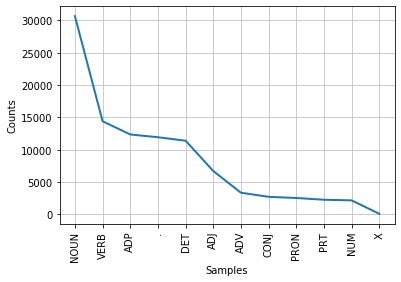

In [19]:
#Lets see which tag was used more in Brown set
fd = nltk.FreqDist([tag for (word,tag) in brown_tagged_words])
fd.plot()
#NOun and Verb were used more

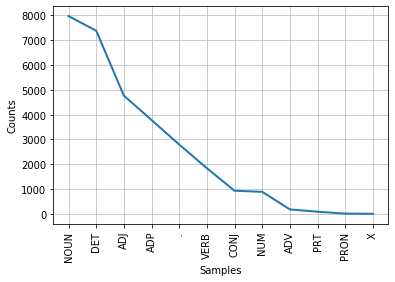

In [25]:
#NOUNS 

bigram=list(nltk.bigrams(brown_tagged_words))
nltk.FreqDist([a[1] for a,b in bigram if b[1]=='NOUN']).plot()

#Determinants, adj are the ones comes before NOUN

# Simple Classifixcation
lets classify the names into male and female using last letter of word.
Names ending in a, e and i are likely to be female, while names ending in k, o, r, s and t are likely to be male.

In [36]:
from nltk.corpus import names
import random

labeled_names = ([(name, 'male') for name in names.words('male.txt')] +[(name, 'female') for name in names.words('female.txt')])
len(labeled_names)

random.shuffle(labeled_names)

In [31]:
def last_word(word):
    return {'last_word':word[-1]}

last_word('Kyle')

{'last_word': 'e'}

In [39]:
#building a classifier

data=[(last_word(name),gender)for (name,gender) in labeled_names]
data[:10]

[({'last_word': 'n'}, 'male'),
 ({'last_word': 'n'}, 'male'),
 ({'last_word': 'a'}, 'female'),
 ({'last_word': 'e'}, 'male'),
 ({'last_word': 'e'}, 'female'),
 ({'last_word': 'a'}, 'female'),
 ({'last_word': 'a'}, 'female'),
 ({'last_word': 'e'}, 'female'),
 ({'last_word': 'e'}, 'female'),
 ({'last_word': 'e'}, 'female')]

In [42]:
train_set, test_set = data[500:], data[:500]

model=nltk.NaiveBayesClassifier.train(train_set)

print(model.classify(last_word('Ted')))
print(model.classify(last_word('Lilly')))


male
female


In [45]:
print(nltk.classify.accuracy(model,test_set))

0.772


In [50]:
#feature engineering, instead of taking last word we take last two word
def generate(word):
    return {'last_word':word[-2:]}

data=[(generate(name),gender)for (name,gender) in labeled_names]
train_set, test_set = data[500:], data[:500]

model=nltk.NaiveBayesClassifier.train(train_set)

print(model.classify(last_word('Ted')))
print(model.classify(last_word('Lilly')))
print(nltk.classify.accuracy(model,test_set))  #enethough we got 78.4, we misclassified Ted as Female

female
female
0.784


In [ ]:
CHUNKING
process of extracting phrases from unstructured text. A single token like south  and africa will not give us proper info
Chunking is very important when you want to extract information from text such as locations, person names. (entity extraction)
We will consider Noun Phrase Chunking and we search for chunks corresponding to an individual noun phrase. In order to create 
NP chunk, we define the chunk grammar using POS tags. We will define this using a single regular expression rule.

In [27]:
text = 'the little red parrot is flying in the sky'

token=nltk.word_tokenize(text)
token_pos=nltk.pos_tag(token)
token_pos

grammer="NP:{<DT><JJ>*<NN>}"

cp=nltk.RegexpParser(grammer)
print(cp.parse(token_pos))

(S
  (NP the/DT little/JJ red/JJ parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))


In [ ]:
WOrdNET

In [1]:
from nltk.corpus import wordnet as wn

In [2]:
wn.synsets('bat')# there are several synonyms or meaning for bat cricket bat, squash bat, bat and so on

[Synset('bat.n.01'),
 Synset('bat.n.02'),
 Synset('squash_racket.n.01'),
 Synset('cricket_bat.n.01'),
 Synset('bat.n.05'),
 Synset('bat.v.01'),
 Synset('bat.v.02'),
 Synset('bat.v.03'),
 Synset('bat.v.04'),
 Synset('cream.v.02')]

In [3]:
print(wn.synset('bat.n.01').lemma_names())  #so this synset has synonyms for bat that is  a bird
print(wn.synset('cricket_bat.n.01').lemma_names())

['bat', 'chiropteran']
['cricket_bat', 'bat']


In [5]:
wn.synset('bat.n.01').definition()

'nocturnal mouselike mammal with forelimbs modified to form membranous wings and anatomical adaptations for echolocation by which they navigate'

In [40]:
for synset in wn.synsets('bat'):
    print(synset.lemma_names())#each synset has its won meaning

['bat', 'chiropteran']
['bat', 'at-bat']
['squash_racket', 'squash_racquet', 'bat']
['cricket_bat', 'bat']
['bat']
['bat']
['bat', 'flutter']
['bat']
['bat']
['cream', 'bat', 'clobber', 'drub', 'thrash', 'lick']


In [48]:
print(wn.synset('good.n.01').examples()) #when used as a noun
print(wn.synset('good.a.01').examples()) # when used as adjectives


['for your own good', "what's the good of worrying?"]
['good news from the hospital', 'a good report card', 'when she was good she was very very good', 'a good knife is one good for cutting', 'this stump will make a good picnic table', 'a good check', 'a good joke', 'a good exterior paint', 'a good secretary', 'a good dress for the office']


In [6]:
#Similarity between two words
#path_similarity(synset2): Return a score denoting how similar two word senses are, based on the shortest path that connects the
#senses in the is-a (hypernym/hypnoym) taxonomy


deer = wn.synset('deer.n.01')
ilk = wn.synset('elk.n.01')
horse = wn.synset('horse.n.01')
print(deer.path_similarity(ilk))
print(deer.path_similarity(horse))



0.5
0.14285714285714285


In [ ]:
#lowest common SUbsumer
FInding the closest ancestor to both deer and girraffe

In [58]:
from nltk.corpus import wordnet_ic
brown_ic = wordnet_ic.ic('ic-brown.dat')

In [61]:
deer.lin_similarity(ilk,brown_ic)

0.8623778273893673

In [55]:
def doc_to_syn(doc):
    tag_dict = {'N': 'n', 'J': 'a', 'R': 'r', 'V': 'v',"PRP":'p'}
    tokens = nltk.word_tokenize(doc)
    pos  =  nltk.pos_tag(tokens)
    tags = [tag[1] for tag in pos]
    wntag= [tag_dict[tag[0]]for tag in tags]
    zip_val = list(zip(tokens,wntag))        
    synset_lst = [wn.synsets(x,y) for x, y in zip_val ]
    final = [val[0] for val in synset_lst if len(val) > 0]
    return final

In [69]:
s1= doc_to_syn('cat jumped tree')
s2 = doc_to_syn('dog jumped tree')

In [72]:
for i1 in s1:
    r=[]
    scores=[x for x in [i1.path_similarity(i2) for i2 in s2]if x is not None]
    

In [74]:
scores



[0.125, 1.0]